In [1]:
import numpy as np
from sklearn import datasets, preprocessing, manifold, cluster, decomposition, metrics
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
custom_data_home = '/home/graba/formation_openclassrooms/TP_op'

In [3]:
mnist = datasets.fetch_mldata('MNIST original', data_home=custom_data_home)

In [4]:
X = mnist.data[::50, :]
y = mnist.target[::50]

In [5]:
X.shape

(1400, 784)

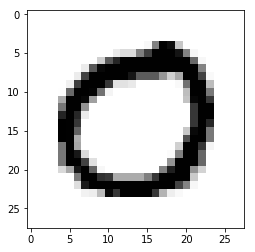

In [6]:
sample_idx = 42
sample_image = np.reshape(X[sample_idx, :], (28, 28))
plt.imshow(sample_image, cmap='binary')

## Normalisation et partitionnement des données par k-means

In [7]:
X_scaled = preprocessing.scale(X)
kmeans = cluster.KMeans(n_clusters=10)
kmeans.fit(X_scaled)

/usr/local/lib/python2.7/dist-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype uint8 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=10, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

## Réduction dimensionnelle par T-SNE

In [8]:
tsne = manifold.TSNE(n_components=2, perplexity=50, n_iter=5000, init='pca')
X_tsne = tsne.fit_transform(X_scaled)

## Visualisation du partitionnement

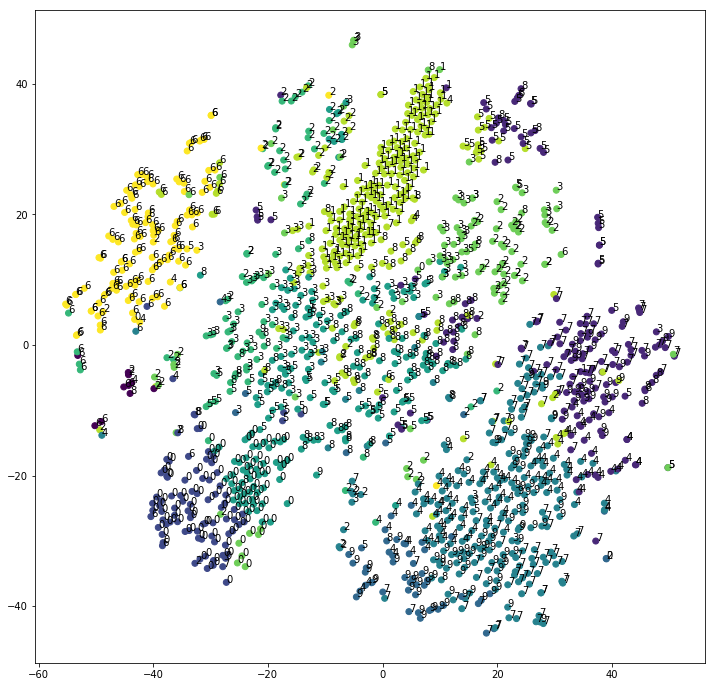

In [9]:
figure(figsize=(12, 12))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=kmeans.labels_)
for i, (a,b) in enumerate (zip(X_tsne[:, 0], X_tsne[:, 1])):
    plt.text(a, b, str('%d' % y[i]))

## Evaluation intrinsèque du partitionnement avec le coefficient de silhouette

In [10]:
metrics.silhouette_score(X_scaled, kmeans.labels_, metric='euclidean')

0.006714056782005416

## Evaluation du partitionnement avec l'indice de Rand ajusté

In [11]:
metrics.adjusted_rand_score(y, kmeans.labels_)

0.2890438073500308